# Morphological Operation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)

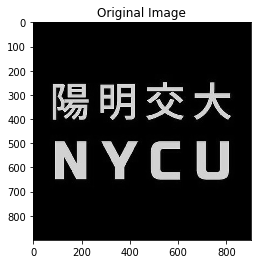

In [4]:
plt_imshow("Original Image",gray)

## Erotion

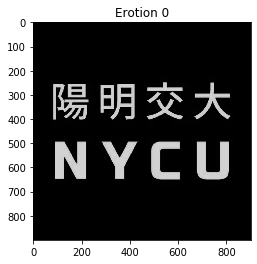

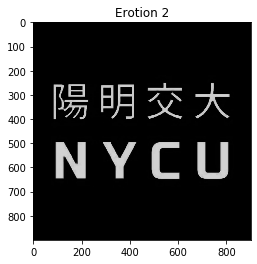

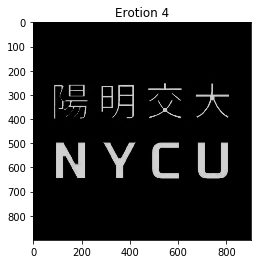

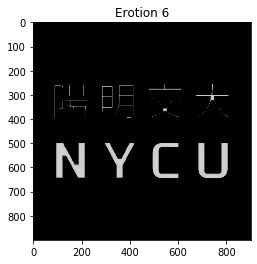

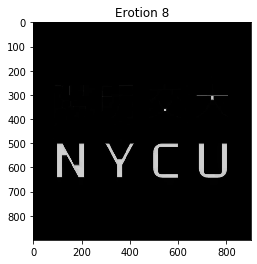

In [5]:
# Erotion
for a in range(0,10,2):
    erotion=cv2.erode(gray,None, iterations=a+1)
    plt_imshow("Erotion "+str(a),erotion )

## Dilation

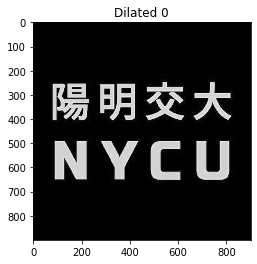

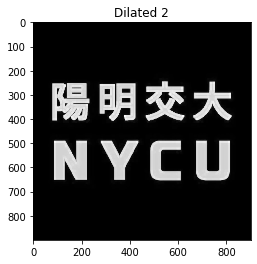

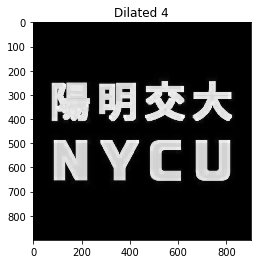

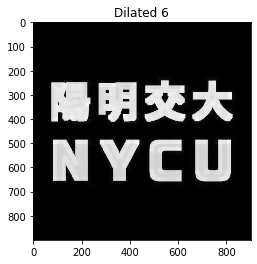

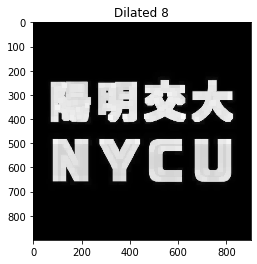

In [6]:
# Erotion
for a in range(0,10,2):
    dilated=cv2.dilate(gray,None, iterations=a+1)
    plt_imshow("Dilated "+str(a),dilated )

## Opening

Opening is erotion followed with dilation and is good for remove the noise

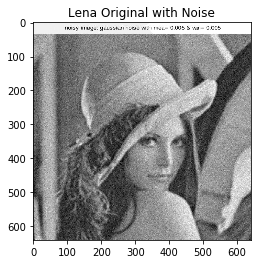

In [7]:
#Create kernel size first
image=cv2.imread("Images/lena_noisy.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt_imshow("Lena Original with Noise",gray)
kernelsizes=[(2,2),(5,5),(7,7),(9,9)]

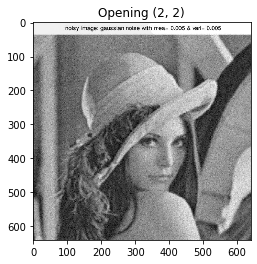

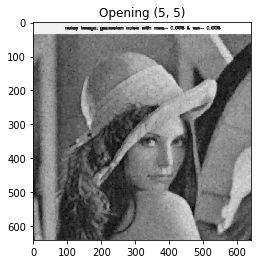

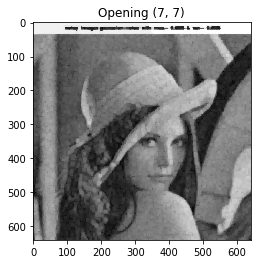

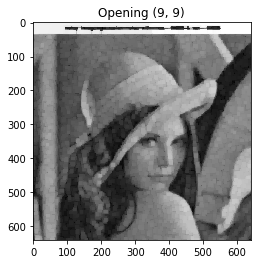

In [8]:
# We can gradually remove noise using opening
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    opened=cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
    plt_imshow("Opening "+ str(kernelsize),opened)

## Closing

Closing is dilation followed by erotion

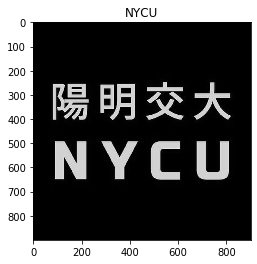

In [9]:
#Create kernel size first
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)
plt_imshow("NYCU",gray)
kernelsizes=[(5,5),(10,10),(15,15),(20,20)]

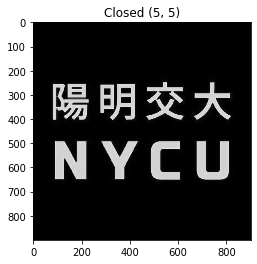

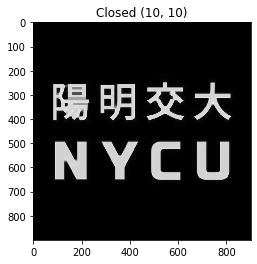

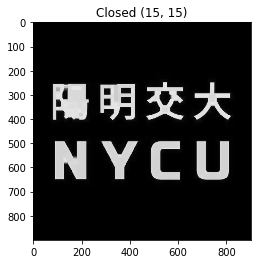

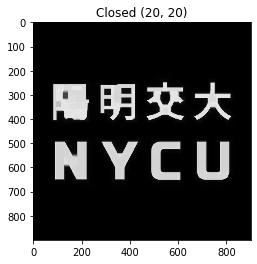

In [10]:
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    closed=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)
    plt_imshow("Closed "+str(kernelsize),closed)

## Morphological Gradient

A morphological gradient is the difference between a dilation and erosio

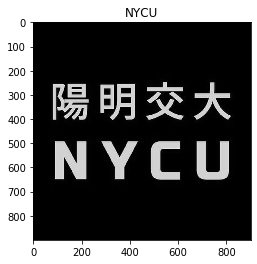

In [11]:
#Create kernel size first
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)
plt_imshow("NYCU",gray)
kernelsizes=[(5,5),(10,10),(15,15),(20,20)]

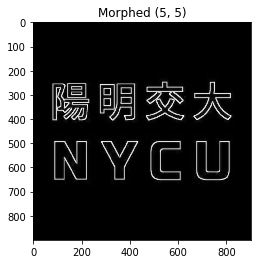

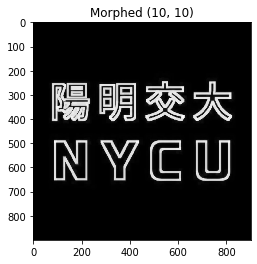

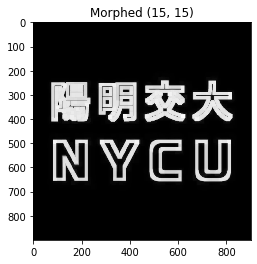

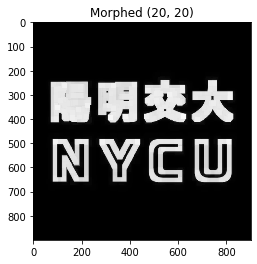

In [12]:
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    morphed=cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,kernel)
    plt_imshow("Morphed "+str(kernelsize),morphed)

## Black Hat

operation which enables us to find dark regions on a light

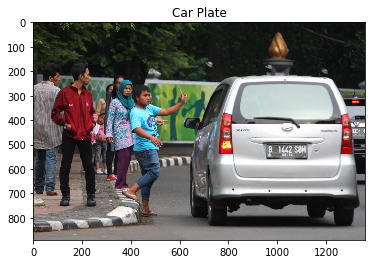

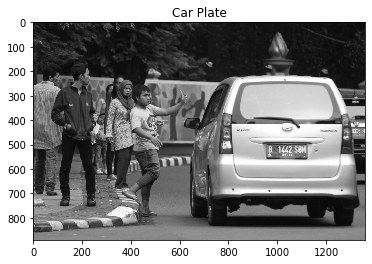

In [13]:
#Create kernel size first
image=cv2.imread("Images/car_plate.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray=cv2.bitwise_not(gray)
plt_imshow("Car Plate",image)
plt_imshow("Car Plate",gray)



In [14]:

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(40,20))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

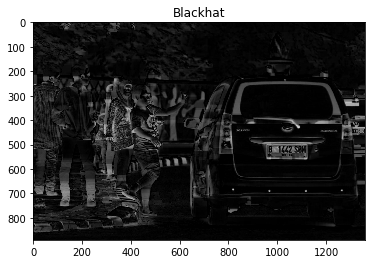

In [15]:
plt_imshow("Blackhat",blackhat)

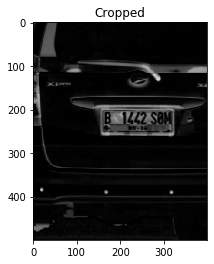

In [16]:
cropped=blackhat[300:800,800:1200]
plt_imshow("Cropped",cropped)

## White Hat

enable us to find light regions on a dark background

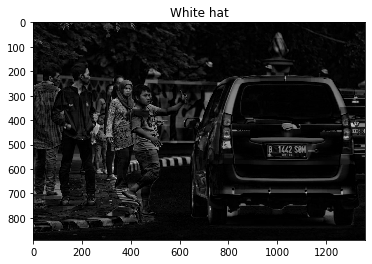

In [17]:
whiteHat=cv2.morphologyEx(gray,cv2.MORPH_TOPHAT,rectKernel)
plt_imshow("White hat",whiteHat) 

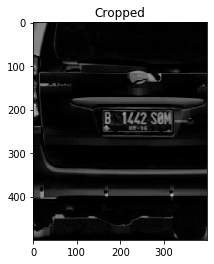

In [18]:
cropped_=whiteHat[300:800,800:1200]
plt_imshow("Cropped",cropped_)

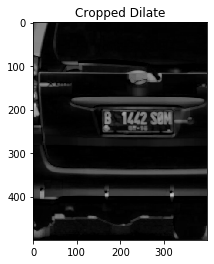

In [19]:
# Lets apply dilation in this image to thicken the license number

kernelsize=(3,3)
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
dilated=cv2.dilate(cropped_,kernel)
plt_imshow("Cropped Dilate",dilated)

# Blurring and Smoothing

## CV2 Blur

In [20]:
image=cv2.imread("Images/car_plate.jpg")

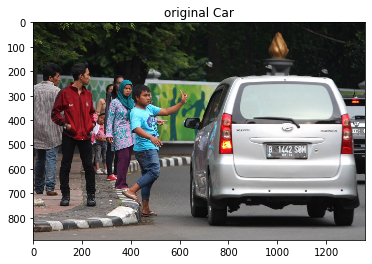

In [21]:
plt_imshow("original Car",image)

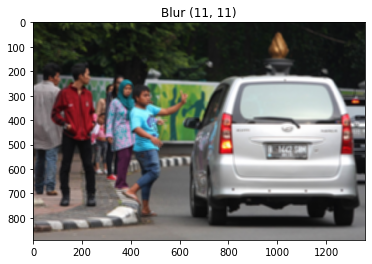

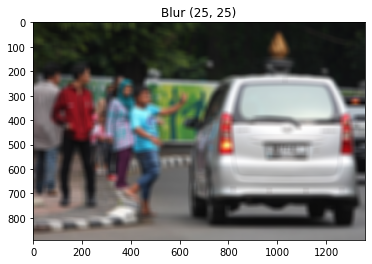

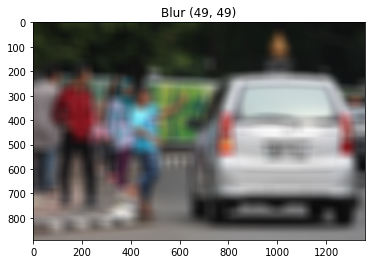

In [22]:
kernelSizes=[(11,11),(25,25),(49,49)]

for kernelsize in kernelSizes:
    blur=cv2.blur(image,kernelsize)
    plt_imshow("Blur {}".format(kernelsize),blur)

## CV2 Gaussian Blur

This blur is more natural to human eyes

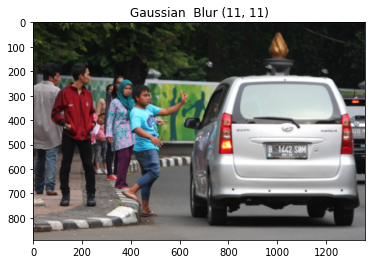

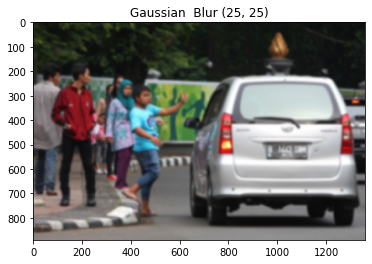

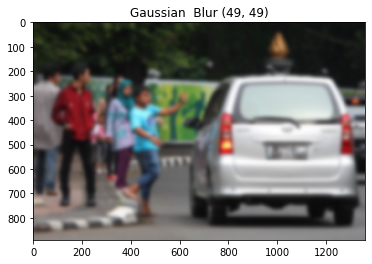

In [23]:

for kernelsize in kernelSizes:
    blur=cv2.GaussianBlur(image,kernelsize,0)
    plt_imshow("Gaussian  Blur {}".format(kernelsize),blur)

## Median Blur

Only good for salt and pepper noise

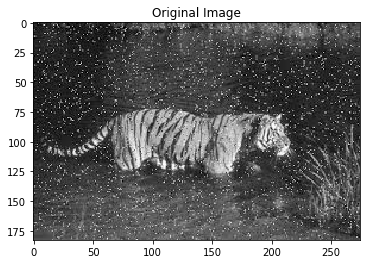

In [24]:
image=cv2.imread("Images/salt_pepper_noise.jfif")
plt_imshow("Original Image",image)

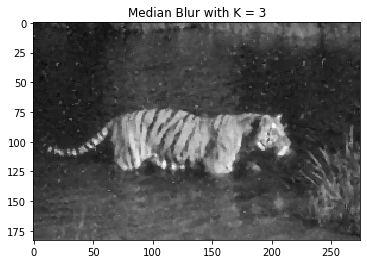

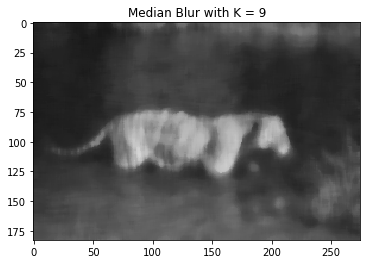

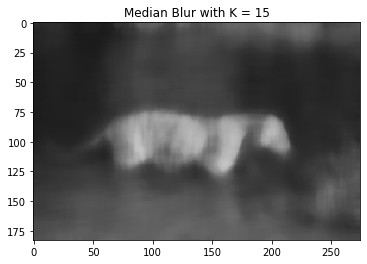

In [25]:
for k in (3,9,15):
    blur=cv2.medianBlur(image,k)
    plt_imshow("Median Blur with K = {}".format(k),blur)

## Bilateral Blurring

To reduce noise while still maintaining edges, we can use bilateral blurring.
P.S It will not working good on salt and pepper noise

Nice application:
For cartoonizing picture

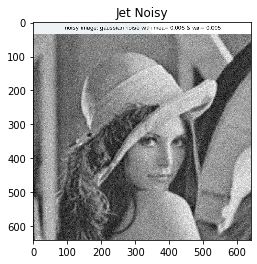

In [26]:
image=cv2.imread("Images/lena_noisy.jpg")
plt_imshow("Jet Noisy",image)

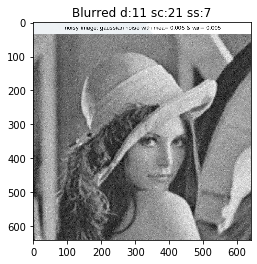

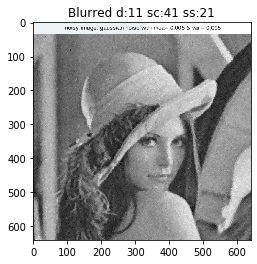

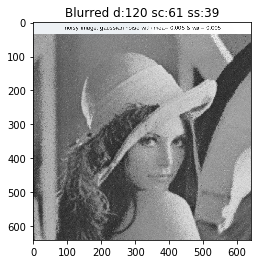

In [27]:
params=[(11,21,7),(11,41,21),(120,61,39)]

for (diameter,sigmaColor,sigmaSpace) in params:
    blur=cv2.bilateralFilter(image,diameter,sigmaColor,sigmaSpace)
    plt_imshow("Blurred d:{} sc:{} ss:{}".format(diameter,sigmaColor,sigmaSpace), blur)

# Color Spaces

## RGB

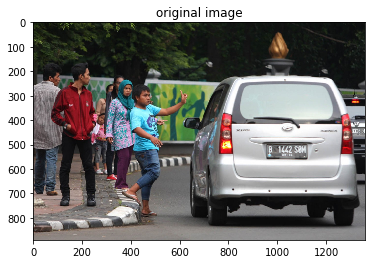

In [28]:
image=cv2.imread("Images/car_plate.jpg")
plt_imshow("original image", image)

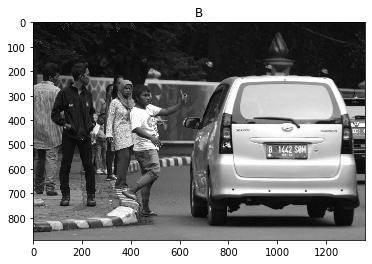

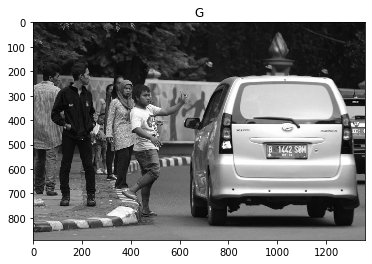

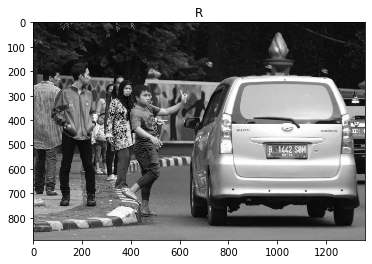

In [29]:
for name,chan in zip(("B","G","R"),cv2.split(image)):
    plt_imshow(name,chan)

## HSV color space

In [30]:
hsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

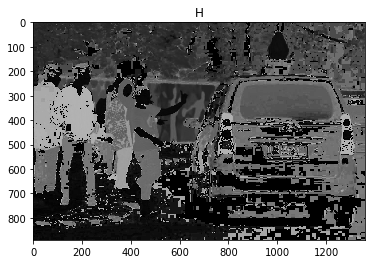

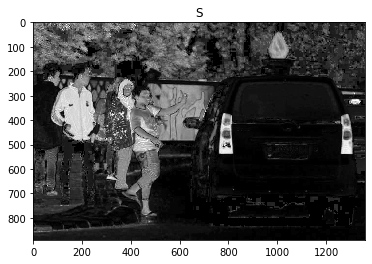

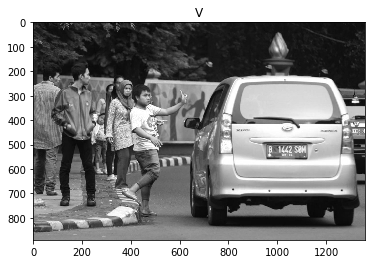

In [31]:
for name,chan in zip(("H","S","V"),cv2.split(hsv_image)):
    plt_imshow(name,chan)

## L.A.B

In [32]:
image_LAB=cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

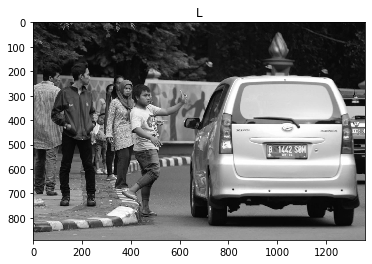

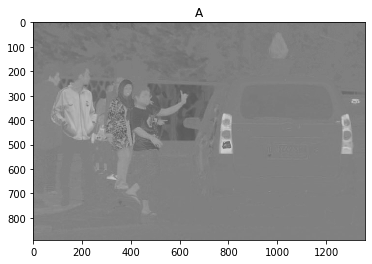

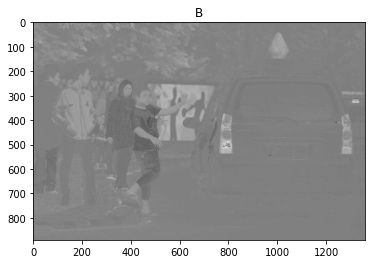

In [33]:
for name,chan in zip(("L","A","B"),cv2.split(image_LAB)):
    plt_imshow(name,chan)

## Grayscale

In [34]:
grayscale_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

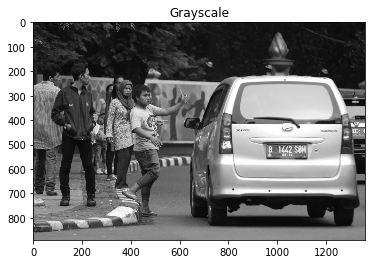

In [35]:
plt_imshow("Grayscale",grayscale_img)

# Thresholding

## SImple Thresholding

In [36]:
image=cv2.imread("Images/coins01.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [37]:
blurred=cv2.GaussianBlur(gray,(13,13),0)

In [38]:
(T,threshInv)=cv2.threshold(blurred,200,255,cv2.THRESH_BINARY_INV)
(T,thresh)=cv2.threshold(blurred,200,255,cv2.THRESH_BINARY)

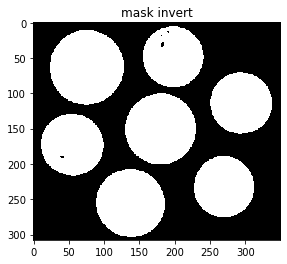

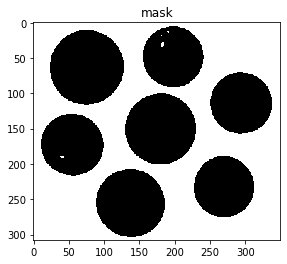

In [39]:
plt_imshow("mask invert",threshInv)
plt_imshow("mask",thresh)

In [40]:
# Apply closing and opening to make mask perfect
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
closedmask=cv2.morphologyEx(threshInv,cv2.MORPH_CLOSE,kernel)
closedmask_=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

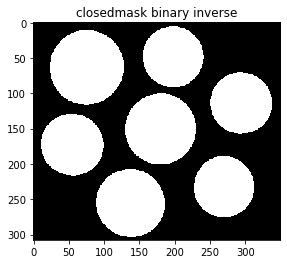

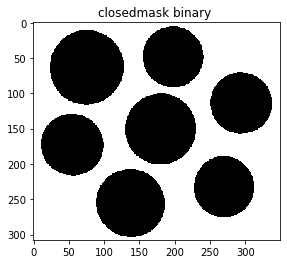

In [41]:
plt_imshow("closedmask binary inverse",closedmask)
plt_imshow("closedmask binary ",closedmask_)

In [42]:
# Apply mask
new_coin=cv2.bitwise_and(image,image,mask=closedmask)

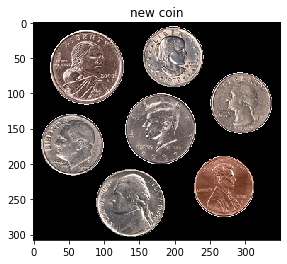

In [43]:
plt_imshow("new coin",new_coin)

### Apply to pokemon

In [44]:
pokemon=cv2.imread("Images/pokemon.png")

In [45]:
gray=cv2.cvtColor(pokemon,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(7,7),0)

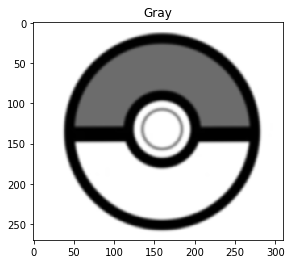

In [46]:
plt_imshow("Gray",gray)

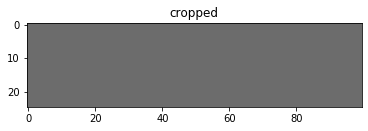

In [47]:
plt_imshow("cropped",gray[50:75,100:200])

In [48]:
gray[50:75,100:200]

array([[108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108],
       ...,
       [108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108],
       [108, 108, 108, ..., 108, 108, 108]], dtype=uint8)

In [49]:
(T,thresh_inv)=cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)

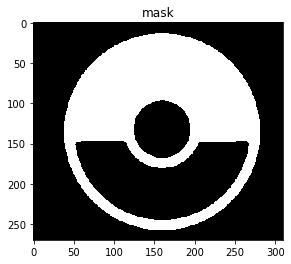

In [50]:
plt_imshow("mask",thresh_inv)

In [51]:
masked=cv2.bitwise_and(pokemon,pokemon,mask=thresh_inv)

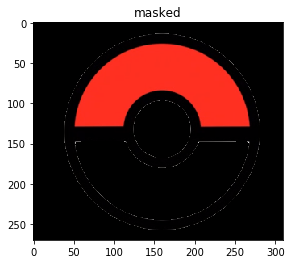

In [52]:
plt_imshow("masked",masked)

## Othsu Thresholding

In [53]:
# set to 0 because it does not effect to thresh otsu
(T,thresh_inv_otsu)=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [54]:
print("Othsu threshold {}".format(T))

Othsu threshold 157.0


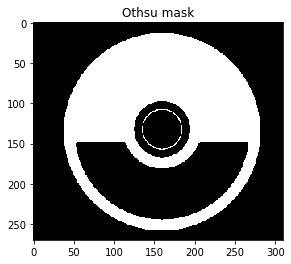

In [55]:
plt_imshow("Othsu mask", thresh_inv_otsu)

In [56]:
masked_othsu=cv2.bitwise_and(pokemon,pokemon,mask=thresh_inv_otsu)

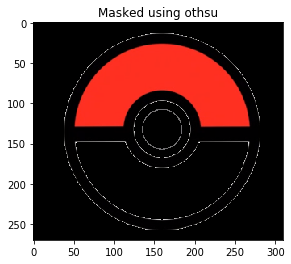

In [57]:
plt_imshow("Masked using othsu",masked_othsu)

## Adaptive Thresholding

We can set T (Thresholding) adaptively not only constant, simply having jsut one value of T is not sufficient

In [347]:
image=cv2.imread("Images/ocr_text.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [348]:
blurred=cv2.GaussianBlur(gray,(5,5),0)

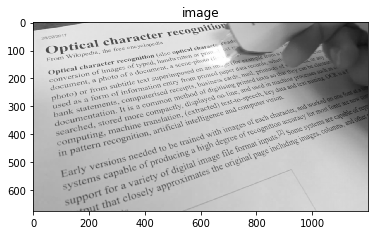

In [349]:
plt_imshow("image",blurred)

In [350]:
T,simple_thres=cv2.threshold(blurred,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )
mean_thresh=cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,21,10)
gaussian_thresh=cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,10)

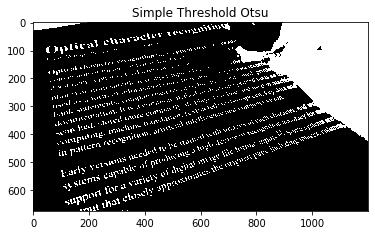

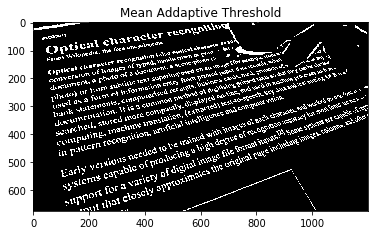

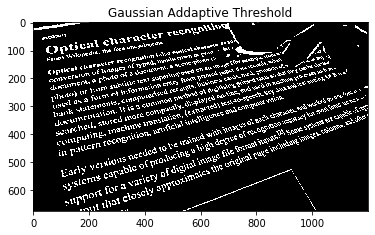

In [351]:
plt_imshow("Simple Threshold Otsu",simple_thres)
plt_imshow("Mean Addaptive Threshold",mean_thresh)
plt_imshow("Gaussian Addaptive Threshold",mean_thresh)

In [352]:
masked=cv2.bitwise_and(image,image,mask=gaussian_thresh)

#Enhanced Text visibility with dilation
dilated_masked=cv2.dilate(masked,(10,10))


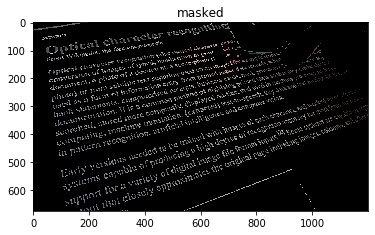

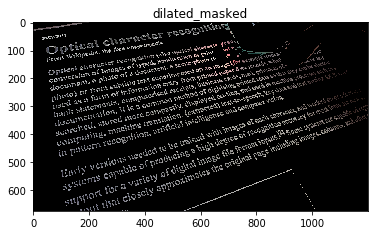

In [353]:
plt_imshow("masked",masked)
plt_imshow("dilated_masked",dilated_masked)

# Kernel and Convolution

In [65]:
smallBlur=np.ones((7,7),dtype="float")*(1.0/(7*7))
largeBlur=np.ones((21,21),dtype="float")*(1.0/(21*21))

In [66]:
sharpen=np.array((
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]),dtype="int")

In [67]:
laplacian=np.array((
    [0,1,0],
    [1,-4,1],
    [0,1,0]),dtype="int")

In [68]:
sobelX=np.array((
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]),dtype="int")

In [69]:
sobelY=np.array((
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]),dtype="int")

In [70]:
kernel_dict={
    "Small Blur":smallBlur,
    "Large Blur":largeBlur,
    "Sharpen":sharpen,
    "Laplacian":laplacian,
    "Sobel X":sobelX,
    "Sobel Y":sobelY
}

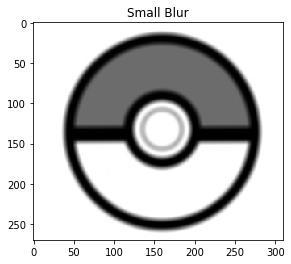

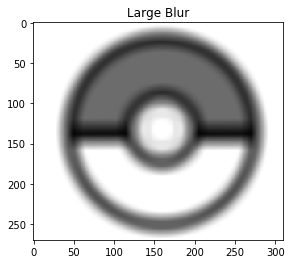

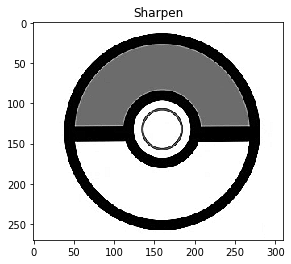

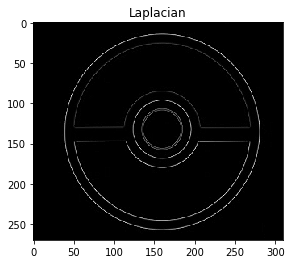

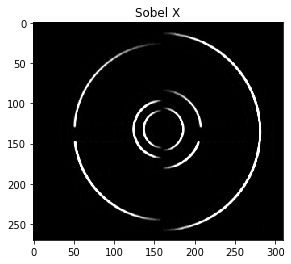

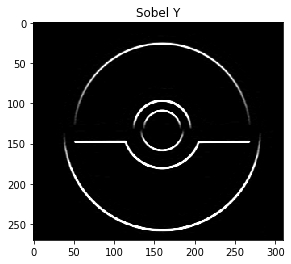

In [71]:
image=cv2.imread("Images/pokemon.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

for (name,item) in kernel_dict.items():
    filtered=cv2.filter2D(gray,-1,item)
    plt_imshow(name,filtered)

# Image Gradient

 WE use gradients for detecting edges in images, which allow us to find contours and outlines of object in images

## Sobel X, SObel Y and Scharr

In [175]:
image=cv2.imread("Images/clonazepam_1mg.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

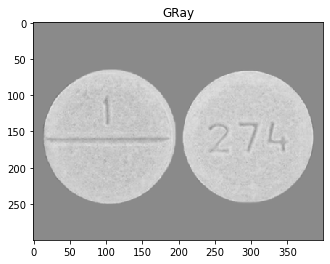

In [176]:
plt_imshow("GRay",gray)

In [177]:
ksize=3 # OR try to set to -1 to change to Scharr
gX=cv2.Sobel(gray,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=ksize)
gY=cv2.Sobel(gray,ddepth=cv2.CV_32F,dx=0,dy=1,ksize=ksize)
# Use ddepth float32 because it convolution

In [178]:
# Convert back to uint8
gX=cv2.convertScaleAbs(gX)
gY=cv2.convertScaleAbs(gY)

In [179]:
# Combine to single image
combined=cv2.addWeighted(gX,0.5,gY,0.5,0)

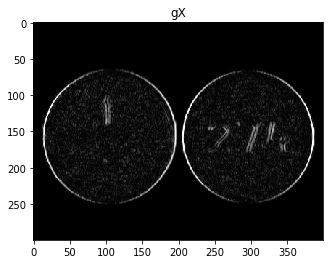

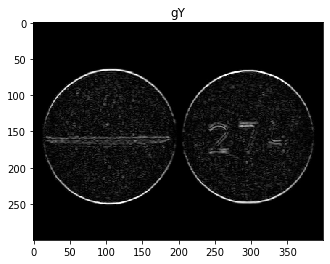

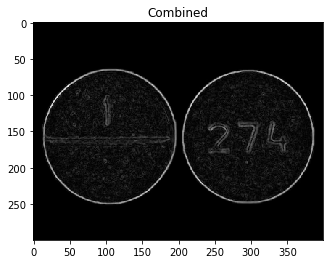

In [180]:
plt_imshow("gX",gX)
plt_imshow("gY",gY)
plt_imshow("Combined",combined)


## Gradient and Orientation

In [181]:
# load the input image and convert it to grayscale
image = cv2.imread("Images/clonazepam_1mg.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute gradients along the x and y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_32F, 0, 1)

# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

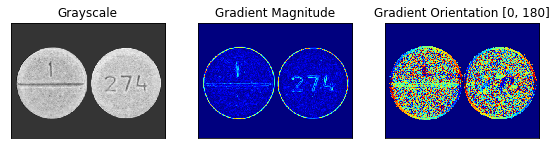

In [182]:
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")

# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")

# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])

# show the plots
plt.tight_layout()
plt.show()

# Canny Edge Detector

What is the difference with image gradient?
    image gradient resulting new grayscale image, but edge detector resulting only binary images and focus for only finding
    the edfe of the main object

In [249]:
image=cv2.imread("Images/clonazepam_1mg.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred=cv2.GaussianBlur(gray,(5,5),0)


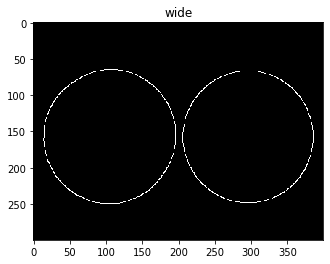

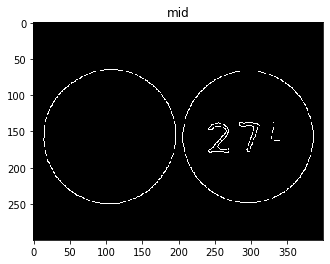

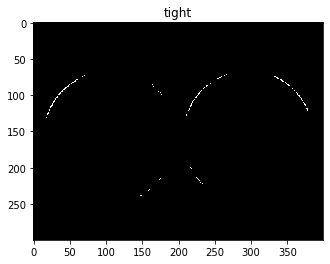

In [265]:
# Manual tuning

wide=cv2.Canny(blurred,0,250)
mid=cv2.Canny(blurred,30,150)
tight=cv2.Canny(blurred,240,250)

plt_imshow("wide",wide)
plt_imshow("mid",mid)
plt_imshow("tight",tight)


# Auto Canny Edge Detector

In [327]:
def auto_canny(image,sigma=0.33):
    v=np.median(image)
    
    lower=int(max(0,(1.0 - sigma)*v))
    upper=int(min(255,(1.0+sigma)*v))
    print("Lower is {} and Upper is {}".format(lower,upper))
    canny_image=cv2.Canny(image,lower,upper)
    
    return canny_image



In [358]:
image=cv2.imread("Images/dolphin.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred=cv2.GaussianBlur(gray,(7,7),-1)
cannied=auto_canny(blurred,0.33)

Lower is 95 and Upper is 190


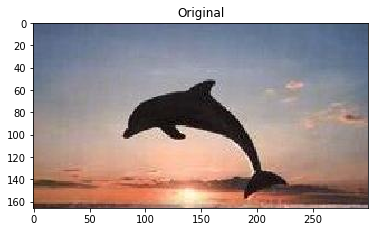

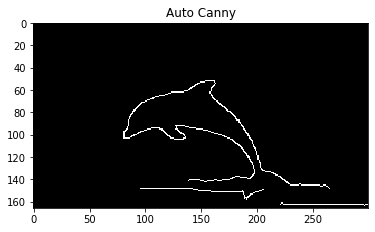

In [359]:
plt_imshow("Original",image)
plt_imshow("Auto Canny",cannied)